In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
from ctadiv import *

In [3]:
def append_new_line(file_name, text_to_append):
    """Append given text as a new line at the end of file"""
    # Open the file in append & read mode ('a+')
    with open(file_name, "a+") as file_object:
        # Move read cursor to the start of file.
        file_object.seek(0)
        # If file is not empty then append '\n'
        data = file_object.read(100)
        if len(data) > 0:
            file_object.write("\n")
        # Append text at the end of file
        file_object.write(text_to_append)


In [4]:
#details=('name, ra (deg) , dec(deg) , alt(deg) , az(deg) , daytime, site ,div ,fov(deg2), tracking')
#append_new_line(f'plots/fov_evolution.txt', details)


## Select the CTA location and time of observation

In [5]:
time='2020-02-07T23:51'
div=0.0022
name='pollux'
cut=3

In [6]:
cta = CTA_Info('north',time)
cta.altaz

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2020-02-07T23:51:00.000


<AltAz Frame (obstime=2020-02-07T23:51:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [7]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS

## Set source location

In [8]:
from astropy.coordinates import get_icrs_coordinates
star = get_icrs_coordinates(name)
star

<SkyCoord (ICRS): (ra, dec) in deg
    (116.32895777, 28.02619889)>

In [9]:
print ("source:", cta.source)
cta.set_source_loc(ra=star.ra, dec=star.dec)
print ("source:", cta.source)
if cta.source.alt<=24*u.deg:
    print('\n\tWARNING: you source is not visible')

source: None
source: <SkyCoord (AltAz: obstime=2020-02-07T23:51:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (221.84144553, 88.95012368)>


## Get locations (sun, moon, source)

## Plot the naviation plot (Sun, Moon, and a source)

<IPython.core.display.Javascript object>


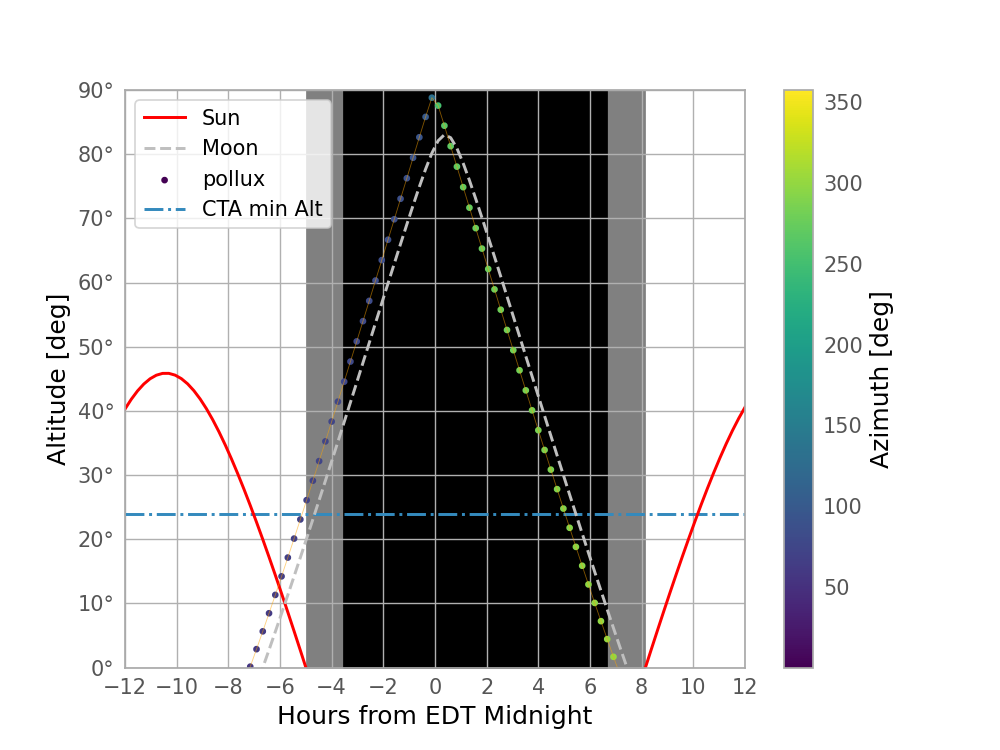

In [10]:
cta.navigation_plot(label = name)
plt.savefig(f'navigation_{name}_{time}.png')
#plt.show()

## Load array and pointing to a source

In [11]:
array =  LoadConfig("./config/layout-3AL4M15-5.txt", frame=cta, pointing2src=True)

#array.set_pointing_coord(star.ra, star.dec)
array.table.units='deg'
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-70.04,-7.23,54.0,221.841,88.950,1.050,28.000,2.150,14.536,-0.014,0.012,1.000,34.63
2,-34.37,110.98,43.0,221.841,88.950,1.050,28.000,2.150,14.536,-0.014,0.012,1.000,94.18
3,76.18,95.34,39.7,221.841,88.950,1.050,28.000,2.150,14.536,-0.014,0.012,1.000,166.98
4,31.81,-19.7,43.0,221.841,88.950,1.050,28.000,2.150,14.536,-0.014,0.012,1.000,117.20
5,-210.65,50.51,61.3,221.841,88.950,1.050,16.000,3.850,46.707,-0.014,0.012,1.000,137.60
6,-179.06,223.02,42.1,221.841,88.950,1.050,16.000,3.850,46.707,-0.014,0.012,1.000,222.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,-196.4,-290.24,88.1,221.841,88.950,1.050,16.000,3.850,46.707,-0.014,0.012,1.000,341.27


## Activate the divergent pointing mode

In [12]:
array.divergent_pointing(div) #0.01453   0.0043

In [13]:
cut

3

In [14]:
array.hFoV()

<Quantity 354.98880413 deg2>

In [15]:
array.hFoV(m_cut=cut)


<Quantity 127.80476645 deg2>

In [16]:
array

<IPython.core.display.Javascript object>


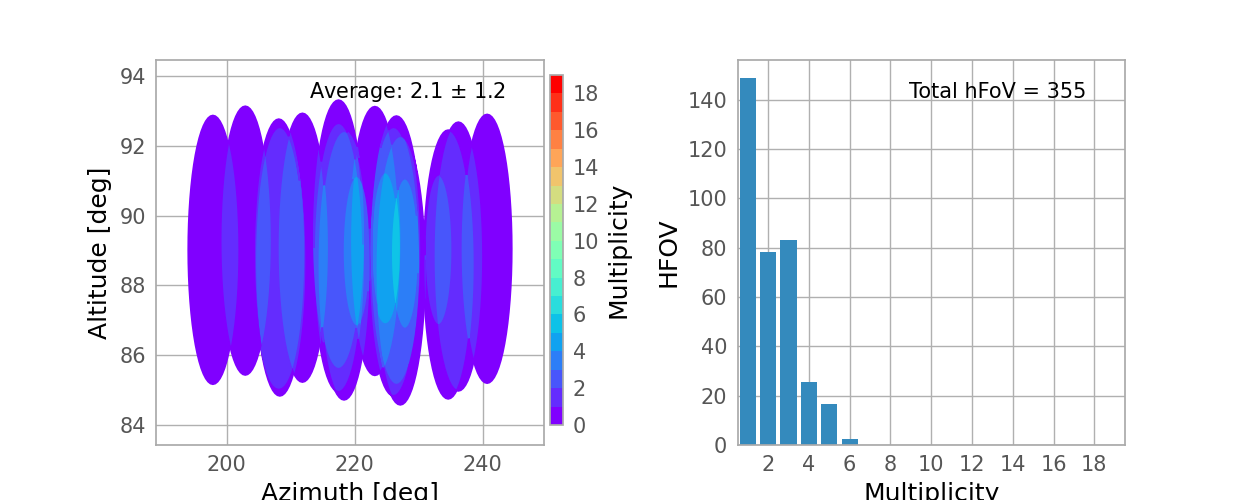

In [17]:
array.multiplicity_plot()

In [18]:
star

<SkyCoord (ICRS): (ra, dec) in deg
    (116.32895777, 28.02619889)>

In [19]:
initial_pointing_dir=array.get_pointing_coord(icrs=True)
initial_pointing_dir

<SkyCoord (ICRS): (ra, dec) in deg
    [(116.37723916, 28.03376993), (116.20776347, 28.07723158),
     (116.22854157, 28.2167211 ), (116.39368906, 28.16209143),
     (116.29672713, 27.85612867), (116.04996959, 27.89342282),
     (116.01689607, 28.15378662), (116.18012459, 28.34229313),
     (116.55699316, 28.27959163), (116.57278063, 28.0291039 ),
     (116.54351648, 27.85286358), (115.82911625, 27.99280044),
     (116.80566418, 28.15128766), (116.78245741, 27.87752527),
     (116.30173466, 28.12240263), (115.82076586, 27.73412889),
     (116.12149247, 27.6855995 ), (116.4186199 , 27.65076534),
     (116.7473272 , 28.3816574 )]>

In [20]:
pointing_start_altaz=array.get_pointing_coord(icrs=False)
pointing_start_altaz

<SkyCoord (AltAz: obstime=2020-02-07T23:51:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(220.31997816, 88.98361177), (227.85677697, 88.91183599),
     (233.11025444, 89.01574766), (224.79461792, 89.08864591),
     (217.49289689, 88.80017218), (226.09410031, 88.6841266 ),
     (236.21901753, 88.82768093), (240.70882927, 89.04989574),
     (223.16402916, 89.27297605), (211.84867171, 89.08071946),
     (208.15326303, 88.9146382 ), (234.62468851, 88.59942209),
     (202.91575283, 89.28362229), (197.85543396, 89.01924507),
     (226.53622997, 89.00314074), (227.1453151 , 88.42764923),
     (218.35141637, 88.57051953), (208.31764329, 88.68430536),
     (217.4881579 , 89.45907581)]>

In [21]:
star_altaz=star.transform_to(cta.altaz)

In [22]:
cta.observer.name


'CTA North'

In [23]:
details=(f'{name},{star.ra.deg},{star.dec.deg},{star_altaz.alt.deg},{star_altaz.az.deg},{cta.t_obs.value},{cta.observer.name},{div},{array.hFoV().value},{array.hFoV(return_multiplicity=True)[1]}initial_point')
append_new_line(f'plots/fov_evolution.txt', details)


## Shifting the observation time and check how it change

In [24]:
array.update_frame(time = time, verbose=True)
array.update_frame(delta_t = 0*u.min, verbose=True)

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2020-02-07T23:51:00.000
Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2020-02-07T23:51:00.000


In [25]:
new_frame=cta.altaz

In [26]:
#array.get_pointing_coord(icrs=False)

In [27]:
final_pointing=initial_pointing_dir.transform_to(new_frame)
final_pointing

<SkyCoord (AltAz: obstime=2020-02-07T23:51:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(220.31997816, 88.98361177), (227.85677697, 88.91183599),
     (233.11025444, 89.01574766), (224.79461792, 89.08864591),
     (217.49289689, 88.80017218), (226.09410031, 88.6841266 ),
     (236.21901753, 88.82768093), (240.70882927, 89.04989574),
     (223.16402916, 89.27297605), (211.84867171, 89.08071946),
     (208.15326303, 88.9146382 ), (234.6246885 , 88.59942209),
     (202.91575283, 89.28362229), (197.85543396, 89.01924507),
     (226.53622997, 89.00314074), (227.1453151 , 88.42764923),
     (218.35141637, 88.57051953), (208.31764329, 88.68430536),
     (217.4881579 , 89.45907581)]>

In [28]:
import matplotlib as mpl
from descartes import PolygonPatch
from shapely.ops import unary_union, polygonize
from shapely.geometry import mapping, Polygon, Point, LineString

polygons = {}
for i,pointing in enumerate(final_pointing):
   
        tel_alt =pointing.alt
        tel_az = pointing.az      
        
        tels_points = pointing
        polygons[i] = Point(tels_points.az.degree, tels_points.alt.degree).buffer(array.table['radius'][i])


rings = [LineString(list(pol.exterior.coords)) for pol in polygons.values()]
union = unary_union(rings)
result = {counter:geom for counter, geom in enumerate(polygonize(union))}

ori = list(polygons.values())
res = list(result.values())

dict_count_overlaps = {}
for i in range(len(res)):
    dict_count_overlaps[i] = 0
    for j in range(len(ori)):
         if np.isclose(res[i].difference(ori[j]).area, 0):
            dict_count_overlaps[i] +=1
             #print(f"res_{colors[i]}, orig_{j+1}")


max_multiplicity = max(dict_count_overlaps.values())

127.80476644542202 3.5188755691178675


<IPython.core.display.Javascript object>


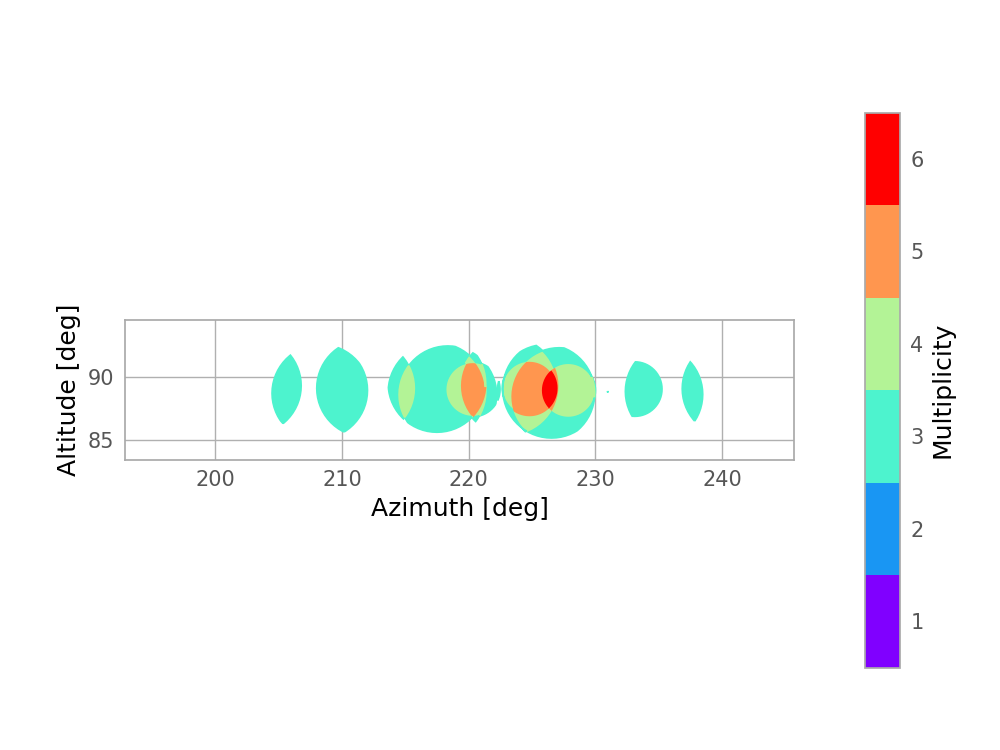

In [29]:
#max_multiplicity = max(dict_count_overlaps.values())
overlaps = np.array(list(dict_count_overlaps.values()))
#print(len(res), len(overlaps_nocut))
eff_hfov = []
eff_overlaps=[]
eff_res=[]
for i,patchsky in enumerate(res):
    
    if overlaps[i]>=cut:
        eff_overlaps.append(overlaps[i])
        eff_hfov.append(patchsky.area)
        eff_res.append(res[i])

    

eff_res=np.array(eff_res)
eff_hfov= np.array(eff_hfov) 
eff_overlaps= np.array(eff_overlaps) 
average_overlap = np.average(eff_overlaps, weights=eff_hfov)

print (eff_hfov.sum(), average_overlap)

cmap = plt.cm.get_cmap('rainbow')
color_list = cmap(np.linspace(0, 1, max_multiplicity))
bounds = np.arange(max_multiplicity + 1) + 1
fig = plt.figure()
gs  = mpl.gridspec.GridSpec(1, 2, width_ratios=[0.95, 0.05])

ax = plt.subplot(gs[0])
ax_cb = plt.subplot(gs[1])

fig.subplots_adjust(top=0.85)

    
for pol_id, pol in enumerate (eff_res):
    colore = eff_overlaps[pol_id]
    ax.add_patch(
         PolygonPatch(mapping(pol), color=color_list[colore-1])
    )


norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cb1 = mpl.colorbar.ColorbarBase(ax_cb,
                                 norm=norm,
                                 cmap=cmap,
                                 boundaries = bounds,
                                 orientation='vertical',
                                label='Multiplicity')
cb1.set_ticks(np.arange(max_multiplicity + 1) + 0.5)
cb1.set_ticklabels(np.arange(max_multiplicity + 1) + 1)
ax.set_xlabel("Azimuth [deg]")
ax.set_ylabel("Altitude [deg]")
ax.set_xlim(np.min(final_pointing.az.value)-5, np.max(final_pointing.az.value)+5)
ax.set_ylim(np.min(final_pointing.alt.value)-5, np.max(final_pointing.alt.value)+5)
ax.set_aspect(1)
#plt.savefig("multiplicity_plot_div{}.png".format(div))
plt.show()


In [30]:
star_altaz=star.transform_to(new_frame)

details=(f'{name},{star.ra.deg},{star.dec.deg},{star_altaz.alt.deg},{star_altaz.az.deg},{cta.t_obs.value},{cta.observer.name},{div},{eff_hfov.sum()},{average_overlap}True')
append_new_line(f'plots/fov_evolution.txt', details)


In [31]:
cut

3

In [32]:
array.hFoV()

<Quantity 354.98880413 deg2>

In [33]:
array.hFoV(m_cut=cut)

<Quantity 127.80476645 deg2>

In [34]:

details=(f'{name},{star.ra.deg},{star.dec.deg},{star_altaz.alt.deg},{star_altaz.az.deg},{cta.t_obs.value},{cta.observer.name},{div},{array.hFoV().value},False')
append_new_line(f'plots/fov_evolution.txt', details)


<IPython.core.display.Javascript object>


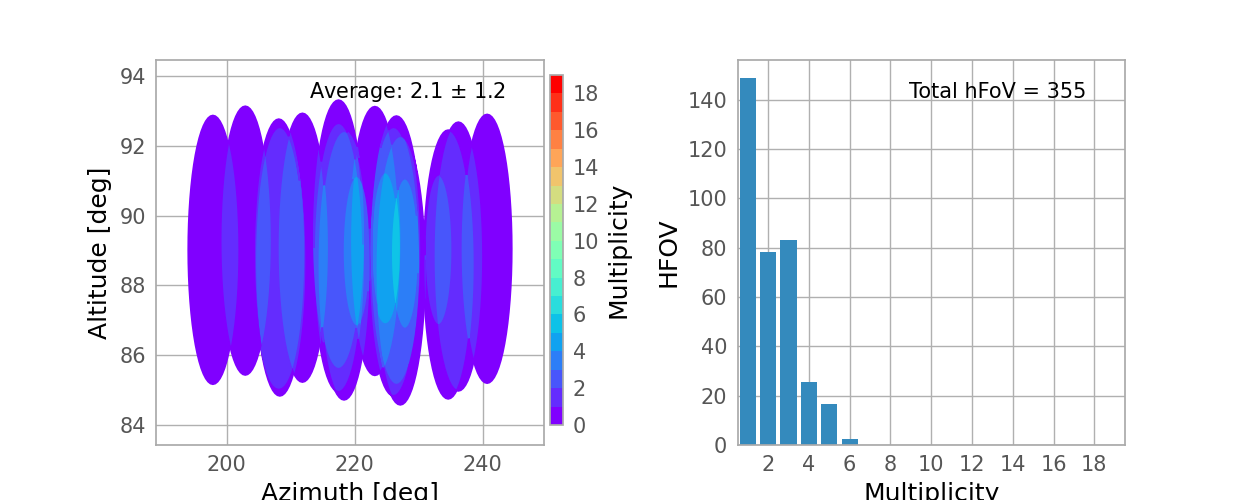

In [35]:
array.multiplicity_plot()

## Get parameters (hFoV, alt, and m) as a function of time

In [36]:
array.update_frame(time = time)

fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
hFoV = [fov.value]
mAve = [m_ave]
t = [0]
alt = [array.pointing["alt"].value]
for i in range(24):
    t.append((i+1)*5)
    array.update_frame(delta_t = 5*u.min)
    fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
    hFoV.append(fov.value)
    mAve.append(m_ave)
    alt.append(array.pointing["alt"].value)

<IPython.core.display.Javascript object>


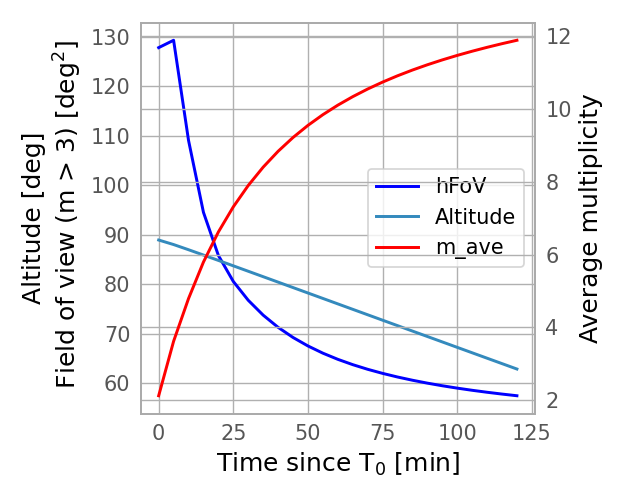

In [37]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV, color="b", label="hFoV")
p2 = ax.plot(t, alt, label="Altitude")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view (m > 3) [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p3 = ax2.plot(t, mAve, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
ps = p1+p2+p3
ax.legend(ps, [p.get_label() for p in ps], loc=5)
plt.show(block=False)
plt.savefig(f'evolution_{name}_{time}_{div}.png')